In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data science project\Data_Science_Project\Dataset\ads.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


## Data profiling and Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


* The dataset has 200 entities/rows. However each columns has 200 not-null rows which means 0 rows are missing.

In [6]:

#This function highlight the minimum values for every columns
def highlight_min(s,props = ''):
    return np.where(s == np.nanmin(s.values), props,'')

df.describe().style.apply(highlight_min,props='color:Black;background-color:Grey')

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


This summary shows the radio columns has minimum values of below zero(0).

So, on these columns, a value of Zero does not make sense and thus indicates missing value.



In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<b> Missing data Handling</b>

In [8]:
df_new = df
df_new[['radio']] = df_new[['radio']].replace(0,np.NaN)

In [9]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         1
newspaper     0
sales         0
dtype: int64

<Axes: >

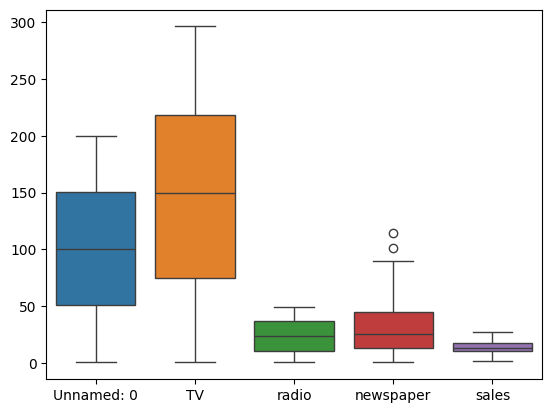

In [10]:
# To visulize the outlier
sns.boxplot(df)

In [11]:
df_new['radio'].fillna(df_new['radio'].mean(),inplace=True) 

In [12]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

* Drop the unessesary column Unnamed: 0 because it only store the number of the rows data.

In [13]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Text(0.5, 1.0, 'Histogram frequency of TV')

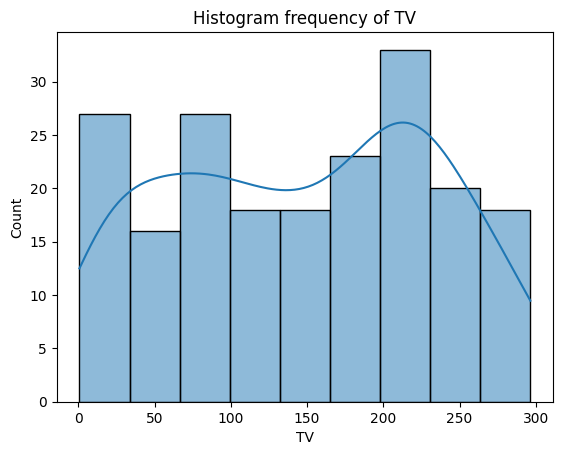

In [15]:
sns.histplot(df['TV'],kde=True)
plt.title("Histogram frequency of TV")

Text(0.5, 1.0, 'Histogram frequency of Radio')

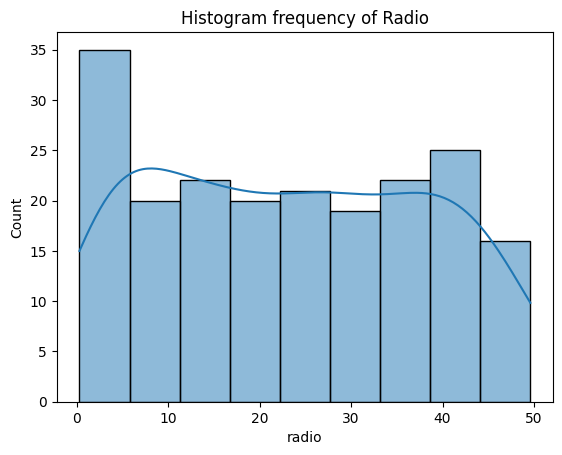

In [16]:
sns.histplot(df['radio'],kde=True)
plt.title("Histogram frequency of Radio")

Text(0.5, 1.0, 'Histogram frequency of Newspaper')

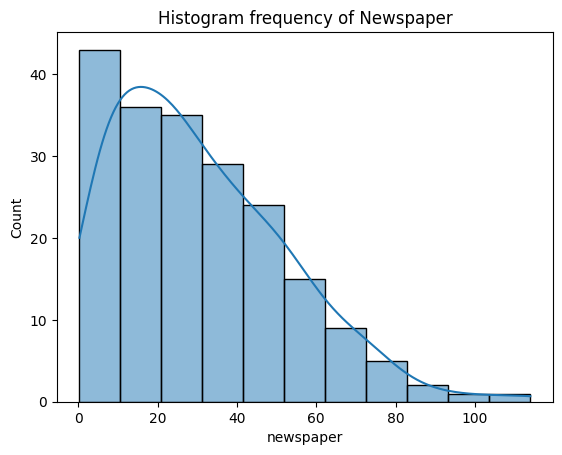

In [17]:
sns.histplot(df['newspaper'],kde=True)
plt.title("Histogram frequency of Newspaper")

## Identifying dependent and independent variable

Dependent variable(y) => Sales

Independent variable(x) => TV,Radio,Newspaper

## Features selection

<Axes: >

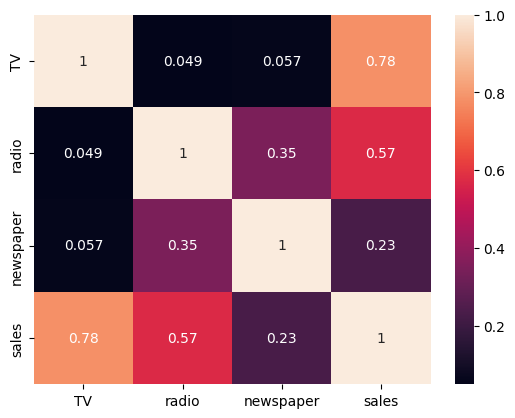

In [18]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

* The target sales(y) has positive correlation 0.78 with TV, 0.57 with radio and 0.23 with newspaper.


so, we use TV as a independent variable because
  * TV is more correlated with sales than others.
  * In current time everyone use the smartphone or socialmedia so it more easily available in inference time.
 

In [19]:
X = df['TV']
y = df.sales

In [20]:
X_array = np.array(X)
X = X_array.reshape(-1,1)

In [21]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

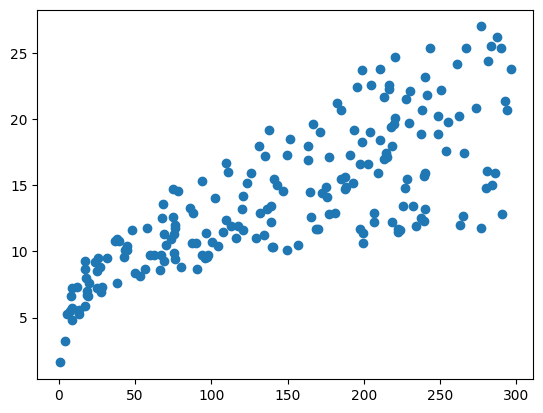

In [22]:
plt.scatter(x=X,y=y)

## Train the model using Single LinearRegression, Lasso and Ridge

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
modelLinear = LinearRegression()
modelLasso = Lasso()
modelRidge = Ridge()


In [32]:
modelLinear.fit(X_train,y_train)
y_pred1 = modelLinear.predict(X_test)

In [34]:
modelLasso.fit(X_train,y_train)
y_pred2 = modelLasso.predict(X_test)

In [35]:
modelRidge.fit(X_train,y_train)
y_pred3 = modelRidge.predict(X_test)

## Evaluation of metrics
  * Mean Absolute Error (MAE): Average of the absolute errors between predicted and actual values.
  * Mean Squared Error (MSE): Average of the squared errors between predicted and actual values.
  * Root Mean Squared Error (RMSE): Square root of the MSE, which provides an interpretable measure in the same units as the target variable.
  * R-squared (R²): Proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

metrics_lr = {
    'R2 Score': r2_score(y_test, y_pred1),
    'Mean Squared Error': mean_squared_error(y_test, y_pred1),
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred1)
}
metrics_lasso = {
    'R2 Score': r2_score(y_test, y_pred2),
    'Mean Squared Error': mean_squared_error(y_test, y_pred2),
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred2)
}
metrics_ridge = {
    'R2 Score': r2_score(y_test, y_pred3),
    'Mean Squared Error': mean_squared_error(y_test, y_pred3),
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred3)
}
df = pd.DataFrame([metrics_lr, metrics_lasso, metrics_ridge], index=['Linear Regression', 'Lasso Regression', 'Ridge Regression'])
print(df)


                   R2 Score  Mean Squared Error  Mean Absolute Error
Linear Regression  0.676315           10.186182             2.505418
Lasso Regression   0.675808           10.202141             2.507299
Ridge Regression   0.676315           10.186186             2.505419


* Every regression model metrics appromexy same score 

In [48]:
data_lr = {'Actual': y_test, 'Predicted_LR': y_pred1}
data_lasso = {'Actual': y_test, 'Predicted_Lasso': y_pred2}
data_ridge = {'Actual': y_test, 'Predicted_Ridge': y_pred3}

# Concatenate the dictionaries into a single DataFrame
df = pd.concat([pd.DataFrame(data_lr), pd.DataFrame(data_lasso), pd.DataFrame(data_ridge)], axis=1)

print(df)

     Actual  Predicted_LR  Actual  Predicted_Lasso  Actual  Predicted_Ridge
18     11.3     10.476233    11.3        10.487570    11.3        10.476236
170     8.4      9.592883     8.4         9.606897     8.4         9.592887
107     8.7     11.451598     8.7        11.459980     8.7        11.451600
98     25.4     20.620950    25.4        20.601546    25.4        20.620945
177    11.7     15.123020    11.7        15.120276    11.7        15.123019
182     8.7      9.878132     8.7         9.891281     8.7         9.878135
5       7.2      7.692762     7.2         7.712534     7.2         7.692767
146    13.2     18.338964    13.2        18.326475    13.2        18.338960
12      9.2      8.387479     9.2         8.405146     9.2         8.387484
152    16.6     16.383633    16.6        16.377069    16.6        16.383631
61     24.2     19.314329    24.2        19.298884    24.2        19.314325
125    10.6     11.304373    10.6        11.313201    10.6        11.304376
180    10.5 